# Advanced Encryption Standard
Links:
* [Presentation](AES-Presentation.pdf)
* [GitHub Repository](https://github.com/Prosamva/AES)
* [Jupyter Notebook](https://github.com/Prosamva/AES/blob/master/aes.ipynb)

<br><br>
### Python Implementation
The implementation is written for visualizing & demonstrating the steps of AES algorithm, so it doesn't completely focus on efficiency. <br><br>
Note: The algorithm uses Electronic Code Book (ECB) mode to process longer data for the sake of simplicity in demonstration. However, ECB mode is insecure as it is vulnerable to frequency analysis, so this encryption mode must be avoided. <br><br>
The symbol "▼" signifies expandable sections. Click to expand/collapse.

In [1]:
from numpy import array, zeros, arange, roll
from numpy.core.fromnumeric import shape
from IPython.core.display import display, HTML
from secrets import token_bytes
from tqdm.notebook import tqdm
from PIL import Image

In [2]:
class AdvancedEncryptionStandard:

    _substitution_box = array(
    [
        0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
        0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
        0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
        0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
        0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
        0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
        0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
        0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
        0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
        0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
        0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
        0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
        0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
        0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
        0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
        0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
    ], dtype='B')

    _substitution_box_inv = zeros(256, dtype='B')
    _substitution_box_inv[_substitution_box] = arange(256, dtype='B')

    _Rcon = array([0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
                   0x80, 0x1B, 0x36, 0x6C, 0xD8, 0xAB, 0x4D, 0x9A,
                   0x2F, 0x5E, 0xBC, 0x63, 0xC6, 0x97, 0x35, 0x6A,
                   0xD4, 0xB3, 0x7D, 0xFA, 0xEF, 0xC5, 0x91, 0x39], dtype='B')
    
    _c = array([[2, 3, 1, 1],
                [1, 2, 3, 1],
                [1, 1, 2, 3],
                [3, 1, 1, 2]], dtype='B')
    
    _c_inv = array([[0x0e, 0x0b, 0x0d, 0x09],
                    [0x09, 0x0e, 0x0b, 0x0d],
                    [0x0d, 0x09, 0x0e, 0x0b],
                    [0x0b, 0x0d, 0x09, 0x0e]], dtype='B')
    
    _key_to_rounds = {16:10, 24:12, 32:14}

    _formatters = {
            'HEX' : lambda x: hex(x)[2:].zfill(2), 
            'BIN' : lambda x: bin(x)[2:].zfill(8), 
            'DEC' : lambda x: str(x).zfill(3)
        }

    def __init__(self):
        self.html_output = ''

    def _get_html(self, body):
        return '''
        <html>
        <head>
        <style>
            *{
                font-size: 15px;
            }
            div.i{
                font-style: italic;
                text-decoration: underline;
                margin-top: 24px;
                margin-top: 5px;
                font-weight: bold;
                font-size: 17px;
            }
            .op{
                vertical-align:middle;
            }
            caption {
                font-size: 10px;
                opacity: 0.6;
            }
            table {
                border-collapse: collapse;
                margin: 3px;
                display: inline;
            }
            th, td {
                border: 1px solid;
                padding: 3px;
                margin: 0;
                text-align: center;
            }
            summary *{
                display: inline-block;
            }
            details{
                padding-left: 16px;
                margin-top: 5px;
            }
        </style>
        </head>
        <body>'''+body+'</body></html>'
    
    def _html_key_table(self, key):
        return f'''
            <h5>Given Key</h5>
            <table>
                <tr>
                    <th>ASCII</th>
                    {''.join('<td>'+chr(k)+'</td>' for k in key)}
                </tr>
                <tr>
                    <th>HEX</th>
                    {''.join('<td>'+self._formatters['HEX'](k)+'</td>' for k in key)}
                </tr>
                <tr>
                    <th>BIN</th>
                    {''.join('<td>'+self._formatters['BIN'](k)+'</td>' for k in key)}
                </tr>
                <tr>
                    <th>DEC</th>
                    {''.join('<td>'+self._formatters['DEC'](k)+'</td>' for k in key)}
                </tr>
            </table>
            '''

    def arr_to_html(self, arr, caption, fmttr = lambda x:x):
        html=f'<table><caption>{caption}</caption>'
        for row in arr:
            html+='<tr>'
            for val in row:
                html+=f'<td>{fmttr(val)}</td>'
            html+='</tr>'
        return html+'</table>'

    def state_matrix_to_html(self, data):
        html = ''
        for c, f in self._formatters.items():
            html+=self.arr_to_html(data, c, f)
        return html
        
    def pad(self, data):
        p = 16 - len(data)%16
        if p==16: return data
        return data+p.to_bytes(p, 'big')

    def unpad(self, data):
        p = int(data[-1])
        if p>16: return data
        return data.rstrip(p.to_bytes(p, 'big'))

    def galois_multiply(self, a, b):
        p = 0
        for _ in range(8):
            p^= -(b&1)&a
            mask = -((a>>7)&1)
            a = (((a<<1)%(1<<9))^(0b100011011 & mask))
            b>>=1
        return p

    def key_expansion(self, key):
        rounds = (self._key_to_rounds[len(key)]+1)*4
        w = [None]*rounds
        for i in range(4):
            w[i] = array([key[4*i+j] for j in range(4)], dtype='B')
        for i in range(4, rounds):
            temp = w[i-1].copy()
            if i%4==0:
                temp = roll(temp, -1)
                temp[:4] = self._substitution_box[temp[:4]]
                temp[0] = temp[0]^self._Rcon[i//4-1]
            w[i] = w[i-4]^temp
        w = array(w, dtype='B')

        html = '<div class="i">Key Expansion</div><table><tr><th></th>'
        for i in range(rounds):
            html+=f'<th>w<sub>{i}</sub></th>'
        for i in range(4):
            html+=f'<tr><th>B<sub>{i}</sub></th>'
            for j in range(rounds): 
                html+=f'<td>{hex((w[j][i]))[2:].zfill(2)}</td>'
            html+='</tr>'
        return w, html+'</table>'
    
    def substitute_bytes(self, data, sbox):
        for i in range(4):
            for j in range(4):
                data[i, j] = sbox[data[i, j]]
        self.html_output+='<div class="i">Substitute Bytes</div>'+self.state_matrix_to_html(data)

    def mix_columns(self, data, c):
        for i in range(4):
            column = data[:, i].copy()
            for j in range(4):
                res = 0
                for k in range(4):
                    res^=self.galois_multiply(c[j, k], column[k])
                data[j, i] = res
        self.html_output+='<div class="i">Mix Columns</div>'+self.state_matrix_to_html(data)

    def shift_rows(self, data, inverse=False):
        v = 1 if inverse else -1
        for i in range(len(data)):
            data[i] = roll(data[i], v*i)
        self.html_output+='<div class="i">Shift Rows</div>'+self.state_matrix_to_html(data)

    def add_round_key(self, data, round_key):
        b = 'BIN'
        self.html_output+='<div class="i">Add Round Key</div>'+self.arr_to_html(data, b, self._formatters[b])+'<span class="op">⊕</span>'+self.arr_to_html(round_key.T, b, self._formatters[b])+'<span class="op">=</span>'
        data^=round_key.T
        self.html_output+=self.arr_to_html(data, b, self._formatters[b])+'<p>State Matrix</p>'+self.state_matrix_to_html(data)

    def _encrypt(self, message, round_keys, rounds):
        self.html_output = ''
        data = array(message, dtype='B').reshape(4, 4).T
        self.html_output+='<p>State Matrix</p>'+self.state_matrix_to_html(data)
        self.add_round_key(data, round_keys[0:4])

        for i in range(1, rounds):
            self.html_output+=f'<details><summary>▼ Round {i}</summary>'
            self.substitute_bytes(data, self._substitution_box)
            self.shift_rows(data)
            self.mix_columns(data, self._c)
            self.add_round_key(data, round_keys[4*i:4*(i+1)])
            self.html_output+='</details>'

        self.html_output+=f'<details><summary>▼ Round {i+1}</summary>'
        self.substitute_bytes(data, self._substitution_box)
        self.shift_rows(data)
        self.add_round_key(data, round_keys[-4:])
        self.html_output+='</details>'

        return bytes(data.T.reshape(1, -1))

    def _decrypt(self, data, round_keys, rounds):
        self.html_output = ''

        data = array(data, dtype='B').reshape(4, 4).T

        self.html_output+='<p>State Matrix</p>'+self.state_matrix_to_html(data)

        self.add_round_key(data, round_keys[-4:])

        for i in range(rounds, 1, -1):
            self.html_output+=f'<details><summary>▼ Round {rounds-i+1}</summary>'
            self.shift_rows(data, inverse=True)
            self.substitute_bytes(data, self._substitution_box_inv)
            self.add_round_key(data, round_keys[4*(i-1):4*i])
            self.mix_columns(data, self._c_inv)
            self.html_output+='</details>'

        self.html_output+=f'<details><summary>▼ Round {rounds-i+2}</summary>'
        self.shift_rows(data, inverse=True)
        self.substitute_bytes(data, self._substitution_box_inv)
        self.add_round_key(data, round_keys[:4])
        self.html_output+='</details>'

        return bytes(data.T.reshape(1, -1))

    def encrypt(self, data, key=None, round_keys=None, rounds=None, key_info_expanded = False):
        html_body = f'<p>Given Plain Text: <b>{data}</b></p>'
        data = bytearray(data)
        data = self.pad(data)
        if key is not None:
            html_body+=f'<details {"open" if key_info_expanded else ""}><summary>▼ Key Information</summary>'+self._html_key_table(key)
            round_keys, html = self.key_expansion(key)
            html_body+=html+'</details>'
            rounds = self._key_to_rounds[len(key)]
        cipher_text = bytearray()
        if len(data)==16:
            html_body+='<details open><summary>▼ AES Encryption</summary>'
            cipher_text = self._encrypt(data, round_keys, rounds)
            html_body += self.html_output
        else:
            html_body+='<p>Using Electronic Code Book (ECB) mode, </p><details open><summary>▼ AES Encryption</summary>'
            for i in tqdm(range(0, len(data), 16), desc='Blocks Processed'):
                message = data[i:i+16]
                html_body+=f'<details><summary>▼ Block {i//16 + 1} | Plaintext: <b>{bytes(message)}</b></summary>'
                cipher_text += self._encrypt(message, round_keys, rounds)
                html_body += self.html_output+'</details>'
        cipher_text = bytes(cipher_text)
        html_body+= f'</details><p>Cipher Text: <b>{cipher_text}</b></p>'
        return cipher_text, HTML(self._get_html(html_body))
    
    def decrypt(self, data, key=None, round_keys=None, rounds=None, key_info_expanded = False):
        html_body = f'<p>Given Cipher Text: <b>{data}</b></p>'
        data = bytearray(data)
        if key is not None:
            html_body+=f'<details {"open" if key_info_expanded else ""}><summary>▼ Key Information</summary>'+self._html_key_table(key)
            round_keys, html = self.key_expansion(key)
            html_body+=html+'</details>'
            rounds = self._key_to_rounds[len(key)]
        decipher_text = bytearray()
        if len(data)==16:
            html_body+='<details open><summary>▼ AES Decryption</summary>'
            decipher_text = self._decrypt(data, round_keys, rounds)
            html_body += self.html_output
        else:
            html_body+='<p>Using Electronic Code Book (ECB) mode, </p><details open><summary>▼ AES Decryption</summary>'
            for i in tqdm(range(0, len(data), 16), desc='Blocks Processed'):
                message = data[i:i+16]
                html_body+=f'<details><summary>▼ Block {i//16 + 1} | Ciphertext: <b>{bytes(message)}</b></summary>'
                decipher_text += self._decrypt(message, round_keys, rounds)
                html_body += self.html_output+'</details>'

        decipher_text = bytes(self.unpad(decipher_text))
        html_body+= f'</details><p>Deciphered Text: <b>{decipher_text}</b></p>'
        return decipher_text, HTML(self._get_html(html_body))

In [3]:
key = 'asdfghjklqwertyu'.encode('ascii')
message = 'Hi! I am Samuel.'

aes = AdvancedEncryptionStandard()

print('AES Encryption:')
cipher, html = aes.encrypt(message.encode('ascii'), key, key_info_expanded = True)
display(html)

print('\n\nAES Decryption:')
decipher, html = aes.decrypt(cipher, key)
display(html)

AES Encryption:




AES Decryption:


In [4]:
key = token_bytes(16)
message = 'Advanced Encryption Standard is cool!'

aes = AdvancedEncryptionStandard()

print('AES Encryption:')
cipher, html = aes.encrypt(message.encode('ascii'), key)
display(html)

print('\n\nAES Decryption:')
decipher, html = aes.decrypt(cipher, key)
display(html)

AES Encryption:


Blocks Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Blocks Processed:   0%|          | 0/3 [00:00<?, ?it/s]



AES Decryption:


Original Image:


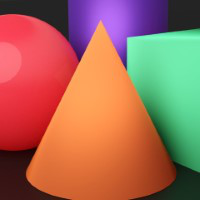

In [5]:
image = Image.open('shapes.jpeg')
print('Original Image:')
display(image)
img_arr = array(image)
img_shape = img_arr.shape

def to_image(data, shape):
    return Image.fromarray(array(bytearray(data)).reshape(shape))

AES Encryption:


Blocks Processed:   0%|          | 0/7500 [00:00<?, ?it/s]

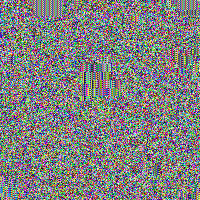



AES Decryption:


Blocks Processed:   0%|          | 0/7500 [00:00<?, ?it/s]

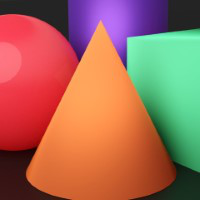

In [6]:
key = 'This is the key!'.encode('ascii')
message = img_arr.flatten()

aes = AdvancedEncryptionStandard()

print('AES Encryption:')
cipher, html = aes.encrypt(message, key)
display(to_image(cipher, img_shape))

print('\n\nAES Decryption:')
decipher, html = aes.decrypt(cipher, key)
display(to_image(decipher, img_shape))

In [7]:
# 24-bit key
key = 'abcdefghijklmnopqrstuvwx'.encode('ascii')
message = 'Hi! I am Samuel.'

aes = AdvancedEncryptionStandard()

print('AES Encryption:')
cipher, html = aes.encrypt(message.encode('ascii'), key, key_info_expanded = True)
display(html)

print('\n\nAES Decryption:')
decipher, html = aes.decrypt(cipher, key)
display(html)

AES Encryption:




AES Decryption:
